# DTEK0042 Exercise 3
    Group Members:
    1. Omar Nasri
    2. Sagar Panwar
  

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a PPG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given PPG signal. Please provide caption and description for every figure. 

## 1- library Imports

In [152]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 2- Data Import and plotting
* Import the PPG signal data “PPG_record.txt” into your python environment and store it in a variable named “PPG_data”.
* The first column contains timestamp of samples, the second one contains red, the third one contains infrared (IR), and the last column contains green sensor data. 
* Take IR signal and store it in a variable called “PPG_sig”.  
* Note: the sampling frequency of this signal is 132 Hz. 
* Plot the IR signal stored in "PPG_sig" VS Time in seconds
* When plotting the data "PPG_sig" vs time in seconds, use the function np.linspace to make a seconds array using the length of "PPG_sig" and the sampling frequency of 132 Hz. Do not use the timestamp column of the data.

     HINT: 
         PPG_data = np.loadtxt(the directory of the PPG Data) 
         
         or
         
         PPG_data = pd.read_csv(the directory of the PPG Data, names = [name for each column])
         * Note: If you are using pandas to load into data, we'd recommend you convert pandas series data to numpy type for further analysis

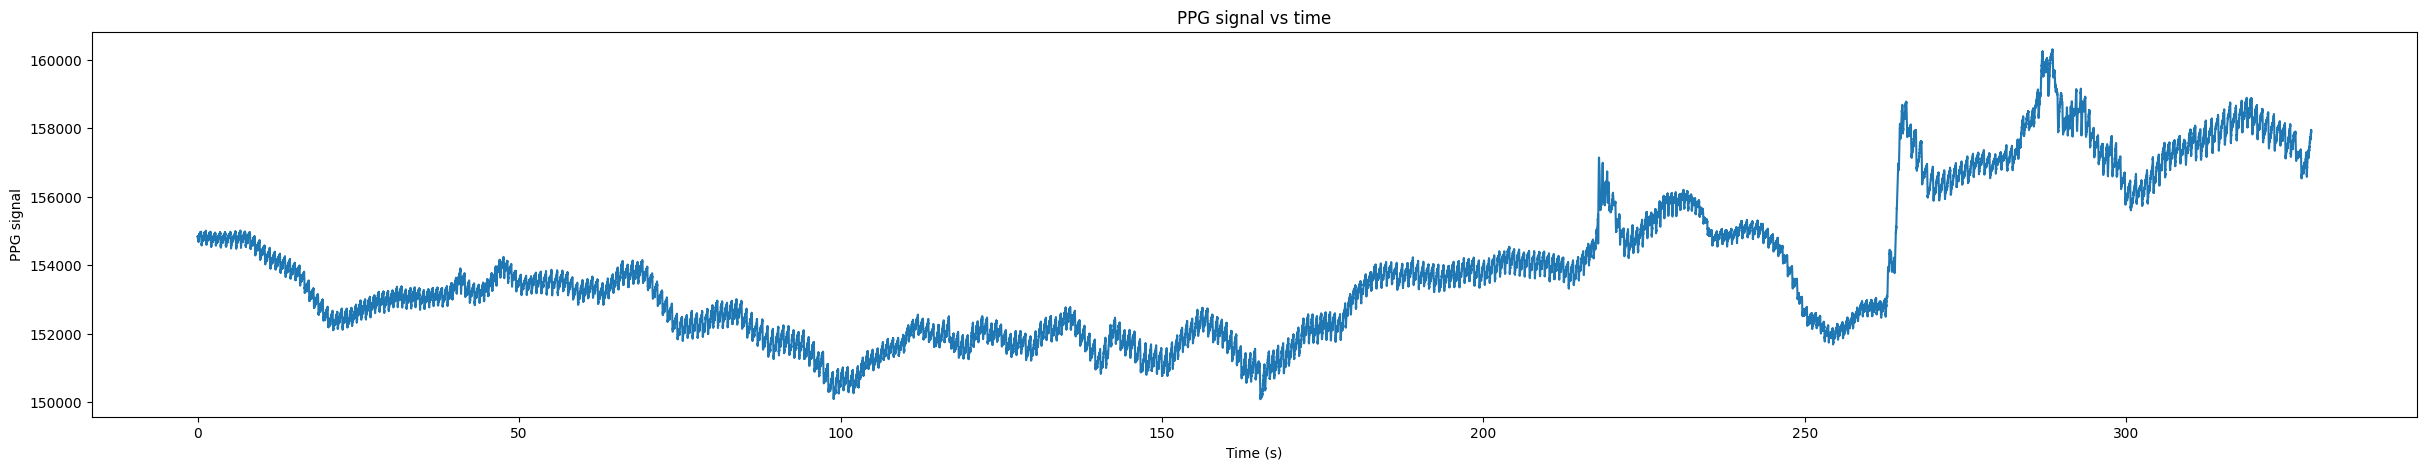

In [153]:
#code
df = pd.read_csv('PPG_record.txt', sep=',',header=None,  names = ['time', 'red', 'infrared', 'green'])
PPG_sig = df['infrared']
Fs= 132
seconds = len(PPG_sig)/Fs


# Plotting the PPG signal 
plt.figure(figsize=(30,5))
plt.plot(np.arange(0,seconds,1/Fs),PPG_sig)
plt.xlabel('Time (s)')
plt.ylabel('PPG signal')
plt.title('PPG signal vs time')
plt.show()


# 3- Compute power spectral density (PSD)

 * Compute power spectral density (PSD) using the Welch method provided by scipy package.  Select only the frequencies between 0.7 and 3Hz since the human heart rate typically does not go beyond these limits. 
 * Plot the limited PSD versus frequency
 * Find the dominant PSD value and its corresponding frequency. 
 * Store the value of the found frequency component in a variable named “dominant_freq”. 
 * Reference:
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html#scipy.signal.welch
 
      
      HINT: 
        PSD_freqs , PSD = scipy.signal.welch() 
        Set the nperseg parameter to be = 10*Fs
        

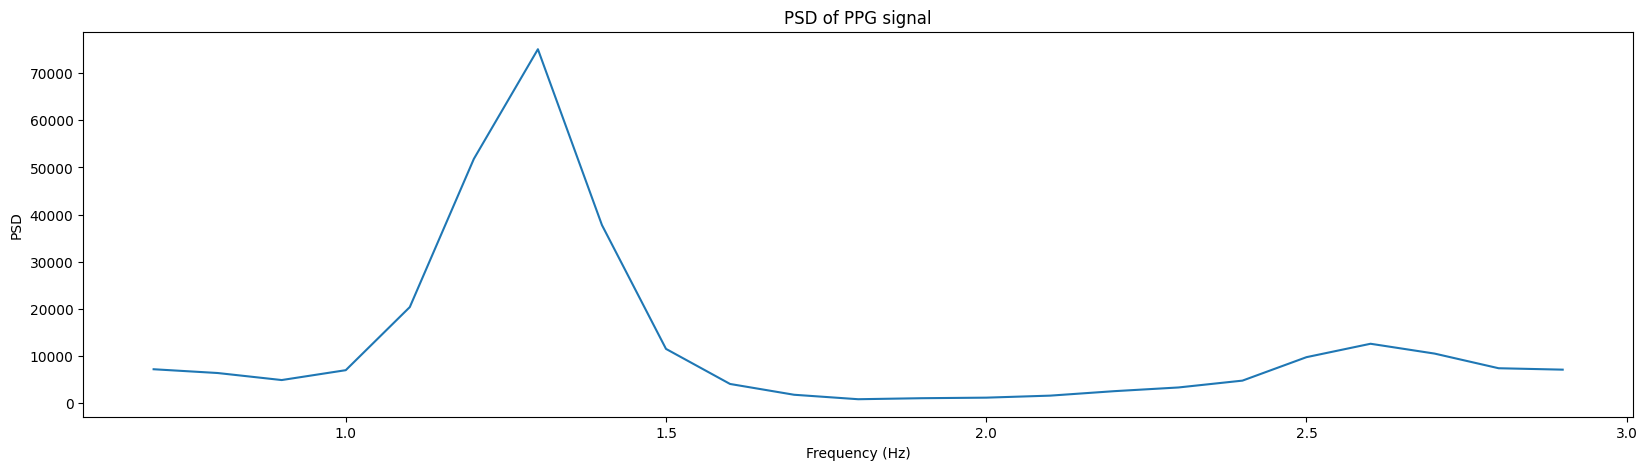

The dominant PSD value is 75103.19231029775 and its corresponding frequency is 1.3 Hz


In [154]:
# create PSD 
PSD = scipy.signal.welch(PPG_sig, Fs, nperseg=1320)
PSD = np.array(PSD)

#Select only the frequencies between 0.7 and 3 Hz
PSD = PSD[:,(PSD[0]>0.7) & (PSD[0]<3)]

#Plot the PSD
plt.figure(figsize=(20,5))
plt.plot(PSD[0], PSD[1])
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('PSD of PPG signal')
plt.show()

#find the dominant PSD value 
max_PSD = np.max(PSD[1])
dominant_freq = PSD[0][np.argmax(PSD[1])]
print('The dominant PSD value is', max_PSD, 'and its corresponding frequency is', dominant_freq, 'Hz')


# 4- Band Pass Filter Design and Filtering of PPG signal
*  Design a band pass filter. Use Butterworth filter of order 4 with cutoff frequencies equal to (dominant_freq – 0.3) and (dominant_freq + 0.3).

* Filter the original PPG signal with the designed filter. 

* Plot the filtered PPG signal showing heartbeats in the form of a sinusoid


* Note: the documentation of scipy package online is very comprehensive and informative. there are examples that 
  you can easily follow and use to solve the given exercise here. 
  https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html    
    
   
      HINT: 
        from scipy.signal import butter, filtfilt, freqz
    

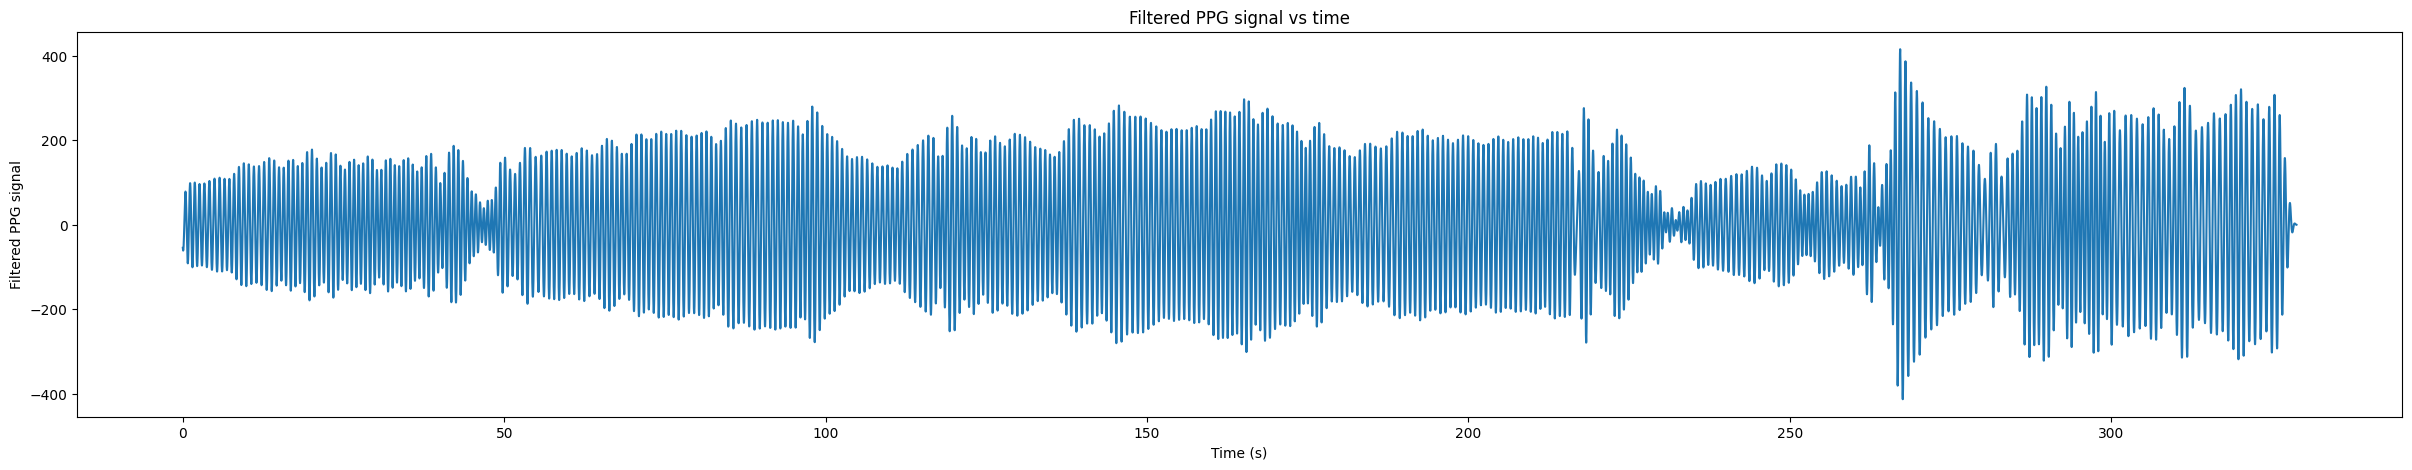

In [155]:
# Create the filter
b, a = scipy.signal.butter(4, [dominant_freq-0.3, dominant_freq+0.3], btype='bandpass', fs=Fs)
filtered_PPG = scipy.signal.filtfilt(b, a, PPG_sig)

# Plot the filtered signal
plt.figure(figsize=(30,5))
plt.plot(np.arange(0,seconds,1/Fs),filtered_PPG)
plt.xlabel('Time (s)')
plt.ylabel('Filtered PPG signal')
plt.title('Filtered PPG signal vs time')
plt.show()



## Observations:
    Many of the unwanted components have clearly been filtered out. The graph is now more consistent, and the peaks can be easily detected.

# 5- Find the maximum extrema points (or peaks) of the signal
* The distance between every two consecutive peak location correlates with the RR interval.
* Find the peaks of the filtered signal in the time domain.
* Calculate these peak-to-peak intervals, store it in a variable named “RR_intervals” and report the average value of these intervals. 
* Convert the computed average value to heart rate as shown below and report it
* You can use “argrelextrema” function in scipy package for peak detection
* Plot Filtered PPG With peak locations
* Describe your observations below
* Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.argrelextrema.html

      HINT:
        from scipy.signal import argrelextrema
        HeartRate = 60.0/avg_peak_intervals 

The average RR interval is 0.7648336511972876 seconds
The average heart rate is 78.44843111449747 bpm


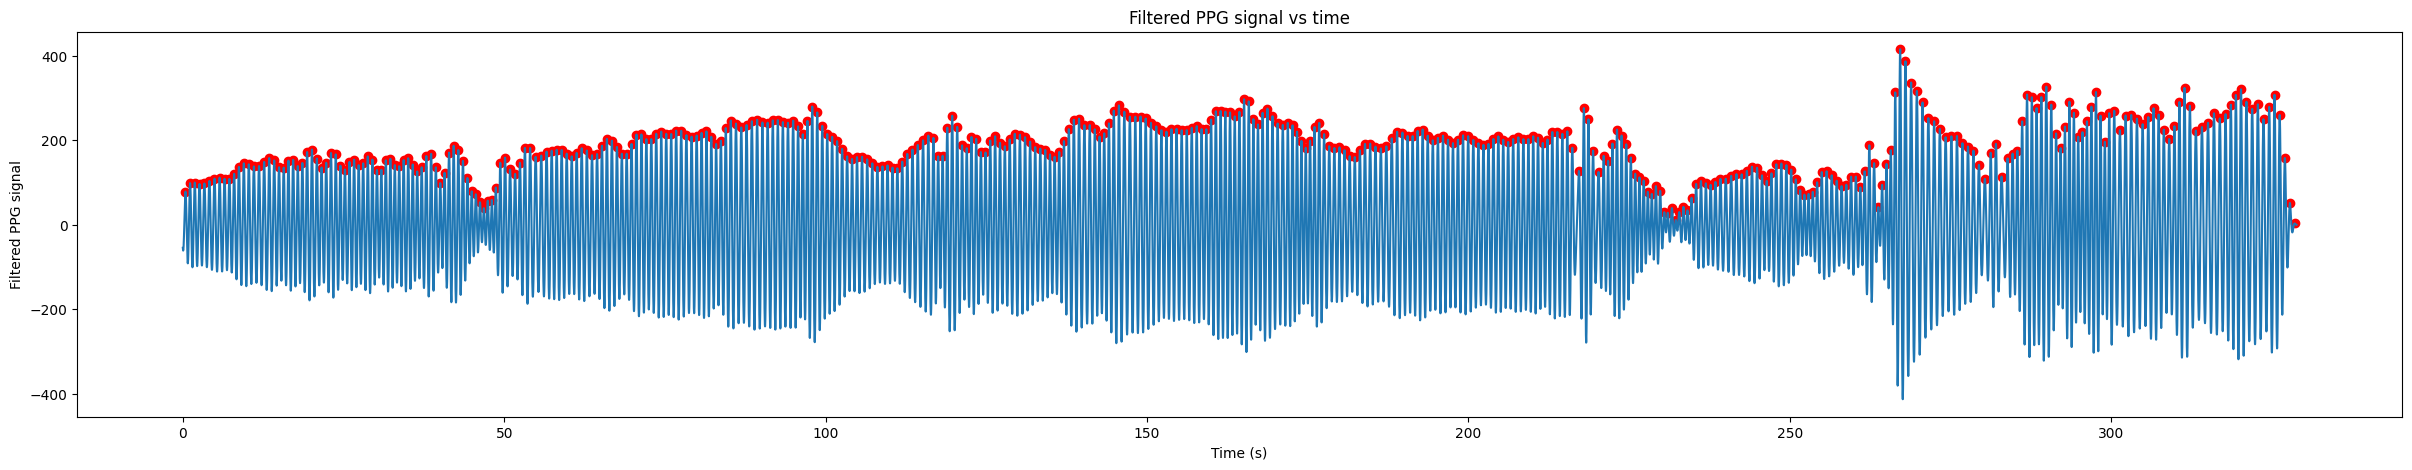

In [156]:
#Find the peaks 
peaks = scipy.signal.argrelextrema(filtered_PPG, np.greater)[0]
RR_intervals = np.diff(peaks)/Fs
avg_peak_intervals = np.mean(RR_intervals)
print('The average RR interval is',avg_peak_intervals, 'seconds')
Heart_rate = 60/avg_peak_intervals
print('The average heart rate is', Heart_rate, 'bpm')

# Plot PPG signal with the peaks
plt.figure(figsize=(30,5))
plt.plot(np.arange(0,seconds,1/Fs),filtered_PPG)
plt.scatter(peaks/Fs, filtered_PPG[peaks], color='red')
plt.xlabel('Time (s)')
plt.ylabel('Filtered PPG signal')
plt.title('Filtered PPG signal vs time')
plt.show()


## Observations: 
    From the RR peaks we can easily calculate the average bpm. However as the measurement time is over 300 seconds, the avg bpm doesn't necessarily tell as that much. To obtain a more informatic bpm measurements, we can calculate bpm at different time points using the RR intervals list.

# 6- Calculate SDNN and RMSSD
* AVNN is average of the time interval between successive normal heart beats. 
* SDNN is standard deviation of the time interval between successive normal heart beats (i.e. the RR-intervals).
* RMSSD is the Root mean square of successive RR interval differences.

* Calculate AVNN, SDNN and RMSSD from the “RR_intervals” variable. 
* These are heart rate variability parameters. Report the AVNN, SDNN and RMSSD values. 
* RMSSD formula can be found in https://www.biopac.com/application/ecg-cardiology/advanced-feature/rmssd-for-hrv-analysis/

* Note: Time unit for intervals should be in millisecond.
   
   HINT:
        Use np.diff(RR_intervals) to calculate the difference between successive rr intervals
        Use np.std() for SDNN
        

In [157]:

AVNN = np.mean(RR_intervals)
print('The average RR interval is',AVNN*1000, 'milliseconds')

SDNN = np.std(RR_intervals)
print('The standard deviation of the RR intervals is',SDNN*1000, 'milliseconds')

RMSSD = np.sqrt(np.mean(np.square(np.diff(RR_intervals))))
print('The root mean square of the successive RR interval differences is',RMSSD*1000, 'milliseconds')


The average RR interval is 764.8336511972876 milliseconds
The standard deviation of the RR intervals is 64.58892769367063 milliseconds
The root mean square of the successive RR interval differences is 34.35929160072258 milliseconds


## Observations:
    Standard deviation in this dataset seems to be quite small, which would indicate that the heart rate is fairly stable throughout the measurements. 